<a href="https://colab.research.google.com/github/TatianaChambrasi/Case-Study-Stout/blob/main/Mogul_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib 


Using matplotlib backend: agg


In [40]:
import pip

In [59]:
!pip install pyspellchecker
from spellchecker import spellchecker

In [63]:
from spellchecker import SpellChecker

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

In [199]:
df = pd.read_csv("Denver Hotel Info (1).csv")
print(df)

                                            Hotel Name  ...  Rate
0                           11th Avenue Hotel & Hostel  ...   $40
1                                          A & D Motel  ...   $33
2                AC Hotels by Marriott Denver Downtown  ...  $226
3                           Affordable Inn Wheat Ridge  ...   $40
4                                        All Inn Motel  ...   $27
..                                                 ...  ...   ...
375                    WoodSpring Suites Denver Aurora  ...   $22
376                WoodSpring Suites Denver Centennial  ...   $24
377  Woolley's Classic Suites Denver International ...  ...   $66
378                                       Wright Motel  ...   $57
379                     Wyndham Origin Hotel Red Rocks  ...  $209

[380 rows x 14 columns]


In [200]:
df2 = pd.read_csv("Denver Hotel Performance.csv")
print(df2)

                                  Name  ... Overall Score
0                        A Bar D Motel  ...            63
1             AC Hotel Denver Downtown  ...            87
2                       Ahwahnee Motel  ...            75
3                         Airway Motel  ...            48
4                Aloft Denver Downtown  ...            83
..                                 ...  ...           ...
327                   White Swan Motel  ...            57
328  Wingate by Wyndham Denver Airport  ...            88
329                   Wolf’S Motor Inn  ...            53
330    WoodSpring Suites Denver Aurora  ...            58
331            Woolleys Classic Suites  ...            93

[332 rows x 8 columns]


In [202]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Hotel Name
Brand Name
City
State
Country
Class Type
Location Type
Price Type
Restaurant (Y/N)
Conference (Y/N)
Spa (Y/N)
Rate

Numeric columns:
Total Rooms
Floor Count


In [26]:
cat_df2 = df2.select_dtypes(include=['object'])
num_df2 = df2.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df2, num_df2)

Non-Numeric columns:
Name
Response rate
Popularity

Numeric columns:
Room Score
Service Score
Food Score
Location Score
Overall Score


In [203]:
df2.isnull().sum()

Name               0
Response rate      1
Popularity        83
Room Score         3
Service Score      2
Food Score        37
Location Score    17
Overall Score      0
dtype: int64

In [204]:
df2.new=df2.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [230]:
df2.new.head()

,Name,Response rate,Popularity,Room Score,Service Score,Food Score,Location Score,Overall Score
1,AC Hotel Denver Downtown,94%,90%,65.0,85.0,72.0,83.0,87
4,Aloft Denver Downtown,97%,72%,61.0,92.0,61.0,91.0,83
5,Aloft Denver International Airport,7%,58%,55.0,76.0,56.0,88.0,79
6,Americas Best Value Inn Lakewood South Tacoma,46%,10%,24.0,60.0,37.0,56.0,55
7,Americas Best Value Inn-Westminster/Huntington...,61%,56%,59.0,87.0,38.0,94.0,80


In [238]:
dfmerg.isnull().sum()

Hotel Name          0
Brand Name          0
City                0
State               0
Country             0
Class Type          0
Location Type       0
Price Type          0
Restaurant (Y/N)    0
Conference (Y/N)    0
Spa (Y/N)           0
Total Rooms         0
Floor Count         0
Rate                0
Food Score          0
Location Score      0
Name                0
Overall Score       0
Popularity          0
Response rate       0
Room Score          0
Service Score       0
dtype: int64

In [207]:
diff_cols = df2.new.columns.difference(df.columns)

In [208]:
df3 = df2.new[diff_cols]

In [209]:
dfmerg = pd.merge(df,df3, left_index=True, right_index=True, how='inner')

In [210]:
print(df_merg)

                                     Hotel Name  ... Service Score
1                                   A & D Motel  ...          85.0
4                                 All Inn Motel  ...          92.0
5                 aloft Hotel Broomfield Denver  ...          76.0
6    aloft Hotel Denver Airport At Gateway Park  ...          60.0
7          aloft Hotel Denver North Westminster  ...          87.0
..                                          ...  ...           ...
319                                  Star Motel  ...          67.0
320                                    Stay Inn  ...          78.0
321           Staybridge Suites Denver Downtown  ...          74.0
328    Suburban Extended Stay Hotel Westminster  ...          81.0
330                    Super 8 Denver Stapleton  ...          50.0

[225 rows x 22 columns]


In [254]:
dfmerg.head()

,Hotel Name,Brand Name,City,State,Country,Class Type,Location Type,Price Type,Restaurant (Y/N),Conference (Y/N),Spa (Y/N),Total Rooms,Floor Count,Rate,Food Score,Location Score,Name,Overall Score,Popularity,Response rate,Room Score,Service Score
1,A & D Motel,Independent,Lakewood,CO,United States,Economy Class,Suburban,Budget,N,N,N,12,1,33.0,72.0,83.0,AC Hotel Denver Downtown,87,90.0,94%,65.0,85.0
4,All Inn Motel,Independent,Denver,CO,United States,Economy Class,Urban,Budget,N,N,N,54,4,27.0,61.0,91.0,Aloft Denver Downtown,83,72.0,97%,61.0,92.0
5,aloft Hotel Broomfield Denver,aloft Hotel,Broomfield,CO,United States,Upscale Class,Suburban,Midprice,N,N,N,139,4,146.0,56.0,88.0,Aloft Denver International Airport,79,58.0,7%,55.0,76.0
6,aloft Hotel Denver Airport At Gateway Park,aloft Hotel,Aurora,CO,United States,Upscale Class,Suburban,Midprice,N,N,N,144,5,66.0,37.0,56.0,Americas Best Value Inn Lakewood South Tacoma,55,10.0,46%,24.0,60.0
7,aloft Hotel Denver North Westminster,aloft Hotel,Westminster,CO,United States,Upscale Class,Suburban,Budget,Y,N,N,120,5,142.0,38.0,94.0,Americas Best Value Inn-Westminster/Huntington...,80,56.0,61%,59.0,87.0


In [253]:
print(dfmerg.dtypes)

Hotel Name           object
Brand Name           object
City                 object
State                object
Country              object
Class Type           object
Location Type        object
Price Type           object
Restaurant (Y/N)     object
Conference (Y/N)     object
Spa (Y/N)            object
Total Rooms           int64
Floor Count           int64
Rate                float64
Food Score          float64
Location Score      float64
Name                 object
Overall Score         int64
Popularity          float64
Response rate        object
Room Score          float64
Service Score       float64
dtype: object


In [211]:
from sklearn.linear_model import LinearRegression

In [241]:
x = dfmerg[["Overall Score"]]
y = dfmerg[["Location Score"]]

In [242]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [243]:
model1 = LinearRegression()

In [244]:
model1.fit(x_train,y_train)

LinearRegression()

In [245]:
print(model1.intercept_)
print(model1.coef_)


[49.65518237]
[[0.44845507]]


In [246]:
dfmerg['Overall Score'].corr(df_merg['Location Score'])

0.48496336958255737

In [247]:
dfmerg['Popularity'] = dfmerg.Popularity.str.replace('%', '').astype(float)

In [252]:
dfmerg['Rate'] = dfmerg.Rate.str.replace('$', '').astype(float)

In [255]:
a = dfmerg[["Popularity"]]
b = dfmerg[["Rate"]]

In [256]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)

In [257]:
model2 = LinearRegression()

In [258]:
model2.fit(a_train,b_train)

LinearRegression()

In [259]:
print(model2.intercept_)
print(model2.coef_)

[106.11017349]
[[0.06645262]]


In [272]:
a = dfmerg[["Room Score"]]
b = dfmerg[["Overall Score"]]

In [273]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)

In [274]:
model3 = LinearRegression()

In [275]:
model3.fit(a_train,b_train)

LinearRegression()

In [276]:
print(model3.intercept_)
print(model3.coef_)

[45.76814584]
[[0.55111738]]


In [277]:
dfmerg['Overall Score'].corr(df_merg['Room Score'])

0.8716417594327622

In [278]:
a = dfmerg[["Service Score"]]
b = dfmerg[["Overall Score"]]

In [279]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)

In [280]:
model4 = LinearRegression()

In [281]:
model3.fit(a_train,b_train)

LinearRegression()

In [282]:
dfmerg['Overall Score'].corr(df_merg['Service Score'])

0.797980892400015

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
b_pred = model3.predict(a)

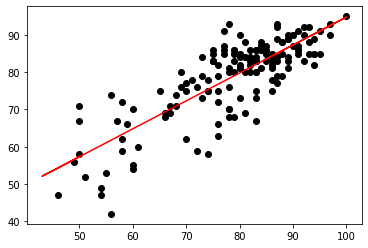

In [323]:
plt.scatter(a_train, b_train, color="black")
plt.plot(a, b_pred, color='red')
plt.show()

***Report: ***
- The relationship when it comes to Hotel Overall Score and Location Score it seems there is a slight relationship between them given the correlation of around .5. 
- Room Score is important when it comes to propperty's Overall Score. Room score relationship with Overall Score is very important because it seems like they play hand in hand. 
- Another important feature when it comes to hotels is the Service Score. The Service Score and Overall Score has a fairly strong correlation of about .8. As the Service Score rises so does the Overall Score of the hotel. 
- One way to show your findings is presenting a linear regression graph I believe this shows clearly the relationship between two variables and how they correlate with one another. 
- In conlclusion, I believe the room and service are key factors in the overall performance of a property. When it comes to location is still important but not as important as some other factors. Some other variables I would look into is what services are offered and maybe depedning on that they are each could play different roles in the performace. Lastly, I would use other models in the future such as classification depending on Class Type or Price Tpye.  